<a href="https://www.kaggle.com/code/dimitrispiniaras/flights-dataset?scriptVersionId=161899303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [2]:
airlines=pd.read_csv('/kaggle/input/flight-delays/airlines.csv')
print(airlines)



   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [3]:
airports=pd.read_csv('/kaggle/input/flight-delays/airports.csv')
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [4]:

flights=pd.read_csv('/kaggle/input/flight-delays/flights.csv')
flights


/tmp/ipykernel_18/2838125981.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv('/kaggle/input/flight-delays/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(flights.columns)


#An intersting thing to see is how much of the data is null
#flight_data.isna().sum()

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [6]:
print(airlines.columns)

Index(['IATA_CODE', 'AIRLINE'], dtype='object')


In [7]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [8]:
# SOme calculations for a few of the variables we encounter:
    
# air_time = wheels_on - wheels_off
# elapsed_time =air_time + taxi_in + taxi_out
# taxi_out = wheels_off - departure_time
# taxi_in = arrival_time - wheels_on



# Cleaning precesses that might be useful are to remove columns where more tna 50% of their values are NaN,we oculd use this:
#     missing_columns = flights.loc[:, flights.isna().mean() >= 0.5].columns To find columns with that volume of missing values
#     flights = flights.drop(missing_columns, axis=1) Drop these columns from the dataset



#We could also check the number of null values for each column of flights dataset. For that lets create a dummy dataset identical to the flights one:
missing_values = pd.DataFrame()
missing_values['Columns'] = flights.columns
missing_values['Num_of_missing_values'] = flights.isnull().sum().values
missing_values['Percent_of_missing_values'] = flights.isnull().sum().values*100/flights.shape[0]
missing_values

,Columns,Num_of_missing_values,Percent_of_missing_values
0,YEAR,0,0.000000
1,MONTH,0,0.000000
2,DAY,0,0.000000
3,DAY_OF_WEEK,0,0.000000
4,AIRLINE,0,0.000000
5,FLIGHT_NUMBER,0,0.000000
6,TAIL_NUMBER,14721,0.252978
7,ORIGIN_AIRPORT,0,0.000000
8,DESTINATION_AIRPORT,0,0.000000
9,SCHEDULED_DEPARTURE,0,0.000000


In [9]:
# TASK 1

# Left join flights with airlines based on 'AIRLINE'
flights_with_airlines = pd.merge(flights, airlines, how='left',left_on='AIRLINE', right_on='IATA_CODE')


flights_with_airlines=flights_with_airlines.rename(columns={'AIRLINE_x': 'AIRLINE_CODES','AIRLINE_y':'AIRLINE'})


# Left join flights_extended with airports based on 'ORIGIN_AIRPORT'
flights_with_origin_airport = pd.merge(flights_with_airlines, airports, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Rename columns after the merge to avoid havings columns with the same name form different datasets like AIRPORT_x and AIRPORT_y
flights_with_origin_airport.rename(columns={'AIRPORT': 'ORIGIN_AIRPORT_NAME', 'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE', 'COUNTRY': 'ORIGIN_COUNTRY',
                                'LATITUDE': 'ORIGIN_LATITUDE', 'LONGITUDE': 'ORIGIN_LONGITUDE'}, inplace=True)


# Left join flights_extended with airports based on 'DESTINATION_AIRPORT' so that we have this information as well
flights_extended = pd.merge(flights_with_origin_airport, airports, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

# Rename columns again so that we know which columns have been added after the second merge with the Destination Airport
flights_extended.rename(columns={'AIRPORT': 'DESTINATION_AIRPORT_NAME', 'CITY': 'DESTINATION_CITY', 'STATE': 'DESTINATION_STATE', 'COUNTRY': 'DESTINATION_COUNTRY',
                                'LATITUDE': 'DESTINATION_LATITUDE', 'LONGITUDE': 'DESTINATION_LONGITUDE'}, inplace=True)


# We remove columns that are double because of the merging, so here we will remove all these
flights_extended.drop(columns=['IATA_CODE_x','IATA_CODE_y','IATA_CODE'], inplace=True)

# Display basic information about the resulting dataset, like number of columns and null values. It would be 47 columns but we dropped the IATA_CODEs
#that existed more than once
flights_extended.info(show_counts=True)

# Display the first few rows of the dataset
#flights_extended.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   YEAR                      5819079 non-null  int64  
 1   MONTH                     5819079 non-null  int64  
 2   DAY                       5819079 non-null  int64  
 3   DAY_OF_WEEK               5819079 non-null  int64  
 4   AIRLINE_CODES             5819079 non-null  object 
 5   FLIGHT_NUMBER             5819079 non-null  int64  
 6   TAIL_NUMBER               5804358 non-null  object 
 7   ORIGIN_AIRPORT            5819079 non-null  object 
 8   DESTINATION_AIRPORT       5819079 non-null  object 
 9   SCHEDULED_DEPARTURE       5819079 non-null  int64  
 10  DEPARTURE_TIME            5732926 non-null  float64
 11  DEPARTURE_DELAY           5732926 non-null  float64
 12  TAXI_OUT                  5730032 non-null  float64
 13  WHEELS_OFF                5

In [10]:
# TASK2 COMMENTS

# Using only DEPARTURE_DELAY to compare airports is not ideal. We have to take into account the size of the airport, how many flights go in and out each day,
# as well as the weather delay for aiports that are in areas with worse weather than others.
# So, we could use this metric to compare airports but also including size of airports, check for SCHEDULED_TIME which shows us airports that are used for 
# longer or shoerter flights. So, basically departure delay is a factor but we cant count on that only to compare airports


In [11]:
#TASK 2 


#  Filter the results where departure_delay is greater than 15 minutes
delayed_flights = flights[flights['DEPARTURE_DELAY'] > 15]

# Calculate the average number of aircraft departures based on 
avg_planes_departed = delayed_flights.groupby('ORIGIN_AIRPORT')['AIRLINE'].count().reset_index()

# Rename the column 'TAIL_NUMBER' to 'AVG_DEPARTURES'
avg_planes_departed.rename(columns={'AIRLINE': 'AVG_DEPARTURES'}, inplace=True)

# Calculate the mean of AVG_DEPARTURES to get the average
avg_departures_mean = avg_planes_departed['AVG_DEPARTURES'].mean()

# Sort the results and select the top 10 airports
top_10_airports = avg_planes_departed.sort_values(by='AVG_DEPARTURES', ascending=False).head(10)

#Print them without indexes for a better look
print(top_10_airports.to_string(index=False))



ORIGIN_AIRPORT  AVG_DEPARTURES
           ORD           65670
           ATL           59192
           DFW           49840
           DEN           42710
           LAX           39282
           IAH           29713
           SFO           29468
           LAS           27586
           PHX           26318
           EWR           22765


In [12]:
# TASK 3

# Filter data for flights departing from the top 10 airports 
flights_from_top10 = flights[flights['ORIGIN_AIRPORT'].isin(top_10_airports['ORIGIN_AIRPORT'])]

# Identify asscociated flights
associated_flights = flights_from_top10[(flights_from_top10['ARRIVAL_DELAY'] < 15) & (flights_from_top10['DEPARTURE_DELAY'] > 15)]

# Group tail numbers by their respective airport
grouped_associated_flights = associated_flights.groupby('ORIGIN_AIRPORT')['FLIGHT_NUMBER'].unique().reset_index()

# Display the grouped association
print('Association between these top 10 airports and the aircrafts:')
print(grouped_associated_flights)

Association between these top 10 airports and the aircrafts:
  ORIGIN_AIRPORT                                      FLIGHT_NUMBER
0            ATL  [3268, 661, 1577, 429, 707, 1190, 1926, 1240, ...
1            DEN  [2392, 1250, 6209, 5241, 5551, 596, 833, 5301,...
2            DFW  [1890, 1176, 320, 2091, 448, 469, 64, 1528, 11...
3            EWR  [5, 73, 1155, 1564, 1111, 244, 1593, 237, 775,...
4            IAH  [1485, 256, 5225, 206, 1273, 1423, 1467, 373, ...
5            LAS  [520, 1903, 446, 2158, 510, 2018, 695, 3851, 2...
6            LAX  [1191, 3096, 1239, 779, 406, 48, 1025, 846, 62...
7            ORD  [729, 1161, 792, 549, 1684, 2224, 331, 1437, 2...
8            PHX  [6523, 316, 1930, 1561, 1720, 567, 329, 1818, ...
9            SFO  [1461, 267, 6264, 1211, 1640, 5586, 600, 1916,...


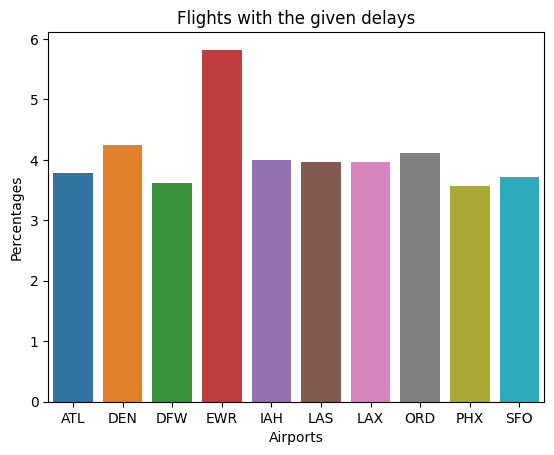

<Figure size 1000x800 with 0 Axes>

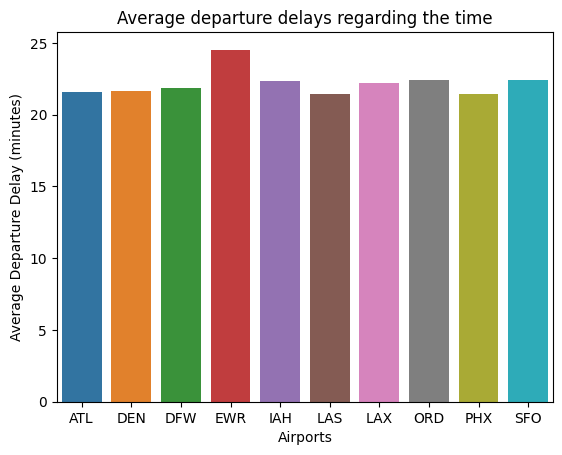

<Figure size 1000x800 with 0 Axes>

In [13]:
# Calculate PERCENTAGE of flights that have this kind of delay for the top 10 airports
# we divide the size(total) of the flights we want versus the toal flights
percentage = (associated_flights.groupby('ORIGIN_AIRPORT').size() / flights_from_top10.groupby('ORIGIN_AIRPORT').size()) * 100
average_departure_delay = associated_flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()

# MOdify our existing Dataframe for plotting
plots = pd.DataFrame({
    'Percentage': percentage.values,
    'Average_Departure_Delay': average_departure_delay.values,
    'ORIGIN_AIRPORT': percentage.index
})

# Plot Percentage for Each Airport

sns.barplot(x='ORIGIN_AIRPORT', y='Percentage', data=plots)
plt.xlabel('Airports')
plt.ylabel('Percentages')
plt.title('Flights with the given delays')

plt.figure(figsize=(10, 8))
plt.show()

# Plot of delays for flights in minutes

sns.barplot(x='ORIGIN_AIRPORT', y='Average_Departure_Delay', data=plots)
plt.xlabel('Airports')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average departure delays regarding the time')


plt.figure(figsize=(10, 8))
plt.show()


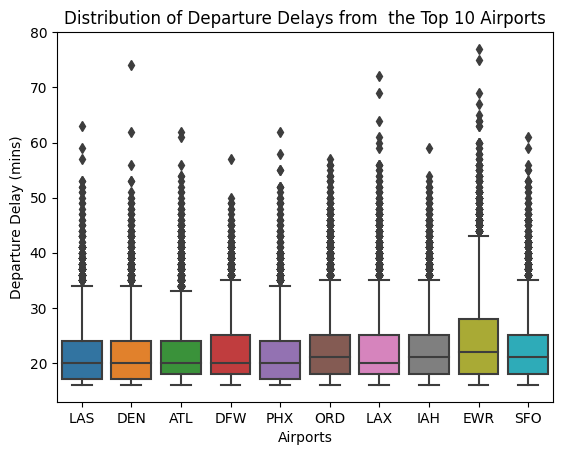

<Figure size 1000x800 with 0 Axes>

In [14]:
# Boxplot of Departure Delays from Top 10 Airports

sns.boxplot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', data=associated_flights)
plt.xlabel('Airports')
plt.ylabel('Departure Delay (mins)')
plt.title('Distribution of Departure Delays from  the Top 10 Airports')
plt.figure(figsize=(10, 8))
plt.show()


Text(0.5, 0.98, 'Departure Delays by Airline')

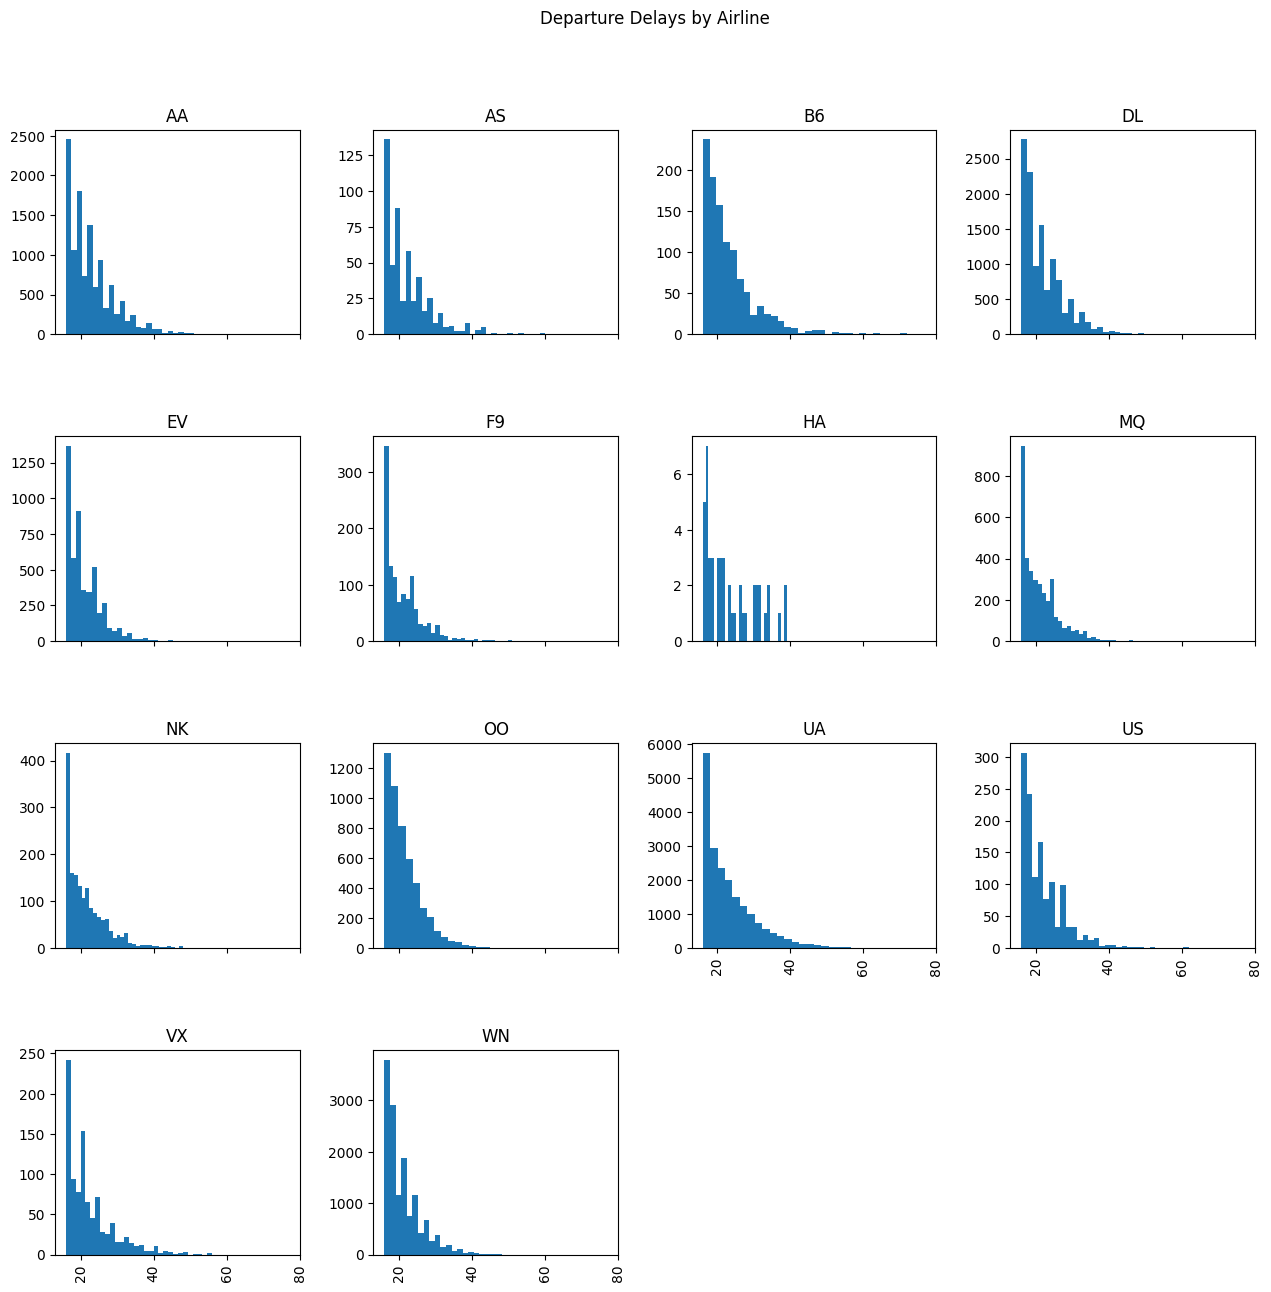

In [15]:
associated_flights.hist(column='DEPARTURE_DELAY', by='AIRLINE', bins=30, figsize=(15, 15),sharex=True)
plt.suptitle('Departure Delays by Airline')



In [16]:
message='thanks for reading this,have a great day'
print(message.upper())

THANKS FOR READING THIS,HAVE A GREAT DAY


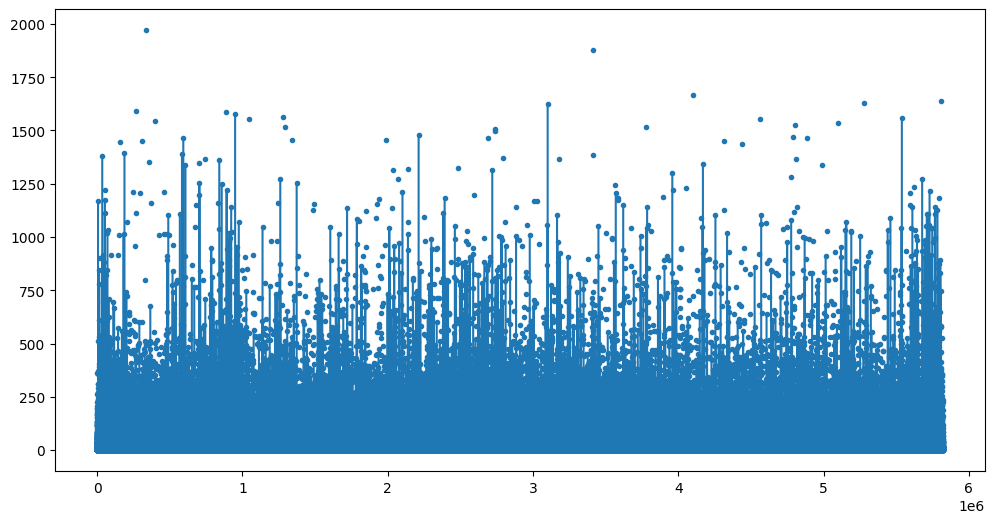

In [17]:
flights_extended['AIRLINE_DELAY'].plot(figsize=(12,6),style='.-')
plt.show()

In [18]:
flights_extended['AIRLINE_DELAY'].isnull().sum()


4755640

In [19]:
flights_extended['AIRLINE_DELAY']=flights_extended['AIRLINE_DELAY'].ffill()
flights_extended['AIRLINE_DELAY']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
5819074    16.0
5819075    16.0
5819076    16.0
5819077    16.0
5819078    16.0
Name: AIRLINE_DELAY, Length: 5819079, dtype: float64

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35    15.0
Name: AIRLINE_DELAY, dtype: float64

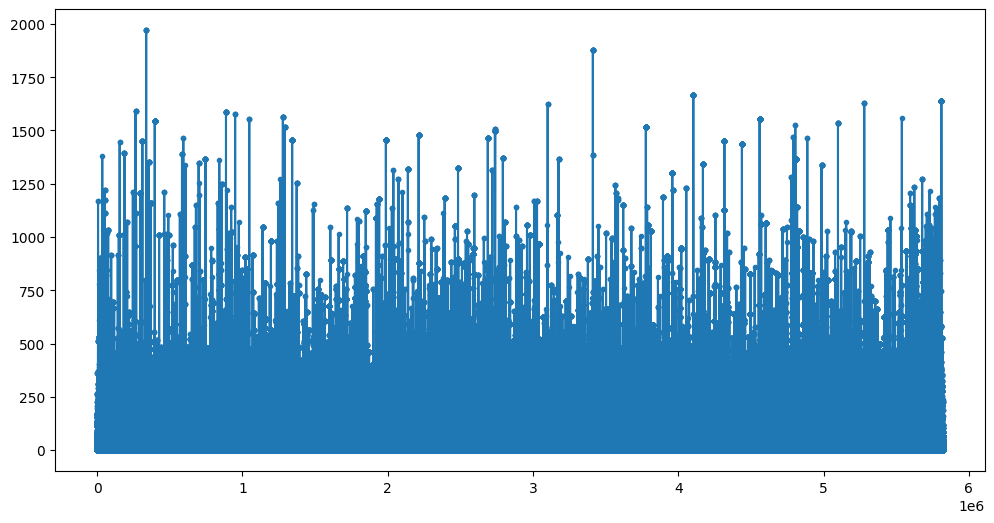

In [20]:
flights_extended['AIRLINE_DELAY']=flights_extended['AIRLINE_DELAY'].bfill()
flights_extended['AIRLINE_DELAY'].plot(figsize=(12,6),style='.-')
#plt.show()
flights_extended['AIRLINE_DELAY'].head(36)

In [21]:
first_non_zero=(flights_extended['AIRLINE_DELAY']!= 0).idxmax()

fill_value= flights_extended.loc[first_non_zero, 'AIRLINE_DELAY']

flights_extended['AIRLINE_DELAY']=flights_extended['AIRLINE_DELAY'].replace(0,fill_value)
flights_extended['AIRLINE_DELAY']


0          15.0
1          15.0
2          15.0
3          15.0
4          15.0
           ... 
5819074    16.0
5819075    16.0
5819076    16.0
5819077    16.0
5819078    16.0
Name: AIRLINE_DELAY, Length: 5819079, dtype: float64

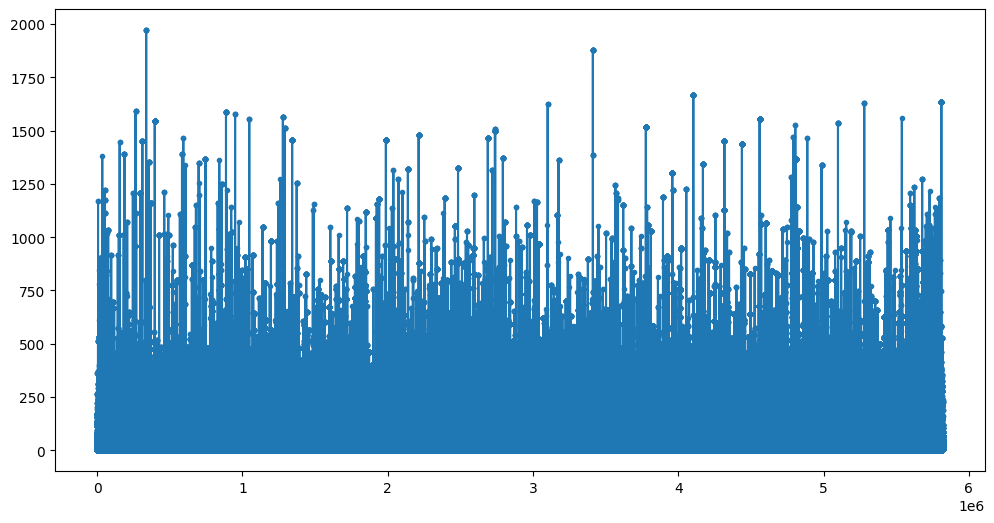

In [22]:
flights_extended=flights_extended[flights_extended['AIRLINE_DELAY'] !=0]
flights_extended['AIRLINE_DELAY'].head(50)

flights_extended['AIRLINE_DELAY'].plot(figsize=(12,6),style='.-')
plt.show()